# EHT PAGA for all WT_filtered cells
# Jun Ying
# 15Apr2024

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.3 pandas==1.5.3 scikit-learn==1.3.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.8


In [2]:
adata0 = sc.read('./write/All_outer_filtered.h5ad')

In [5]:
adata1 = sc.read('./write/All_outer_leidenv2.h5ad')

In [7]:
adata0 = adata1[adata0.obs_names]

In [9]:
adata0.var = pd.DataFrame(adata0.var.index)

In [11]:
adata0.var.drop(columns=0,inplace=True)

In [ ]:
adata0.write('./write/All_outer_filtered.h5ad')

In [16]:
adata0.var_names = adata1.var_names

In [22]:
c25 = sc.read('./write/c25_wt_filtered.h5ad')

In [24]:
adata0.obs['CT_Final'] = adata0.obs['CT_new2']

In [25]:
adata0.obs['CT_Final'] = adata0.obs['CT_Final'].cat.rename_categories(
    {'Leiden_v2_Cluster25,0':'EHT-2',
     'Leiden_v2_Cluster25,1':'EHT-4',
     'Leiden_v2_Cluster25,2':'EHT-3',
     'Leiden_v2_Cluster25,3':'EHT-1',
    }) 

In [26]:
sc.tl.paga(adata0, groups="CT_Final")

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:10)


In [35]:
adata0.uns['CT_Final_colors'] = adata0.uns['CT_new2_colors']

In [51]:
adata0.uns['paga']['pos']

array([[ 4.418785  , -4.873722  ],
       [ 6.6587143 ,  7.7149487 ],
       [-2.076178  ,  4.8456035 ],
       [12.783888  ,  5.3211336 ],
       [14.779589  , 16.877663  ],
       [10.9570055 , 15.0654545 ],
       [11.484387  ,  2.4399376 ],
       [ 7.4672346 , -0.44909397],
       [ 9.887108  ,  1.0519316 ],
       [12.744266  ,  4.918494  ],
       [17.917606  ,  9.261082  ],
       [ 9.3024845 , -4.845041  ],
       [ 8.838013  , -1.7927222 ],
       [ 6.293098  , -5.9726534 ],
       [ 4.2797856 ,  7.0062532 ],
       [-2.3532944 , 14.348587  ],
       [ 5.2260194 , -0.8703378 ],
       [ 7.2606688 , 10.455162  ],
       [13.319078  ,  7.0997467 ],
       [ 3.785987  , 15.136305  ],
       [ 3.6895633 , -3.924994  ],
       [ 5.4149685 ,  3.35451   ],
       [ 3.774241  , 10.815046  ]], dtype=float32)

--> added 'pos', the PAGA positions (adata.uns['paga'])


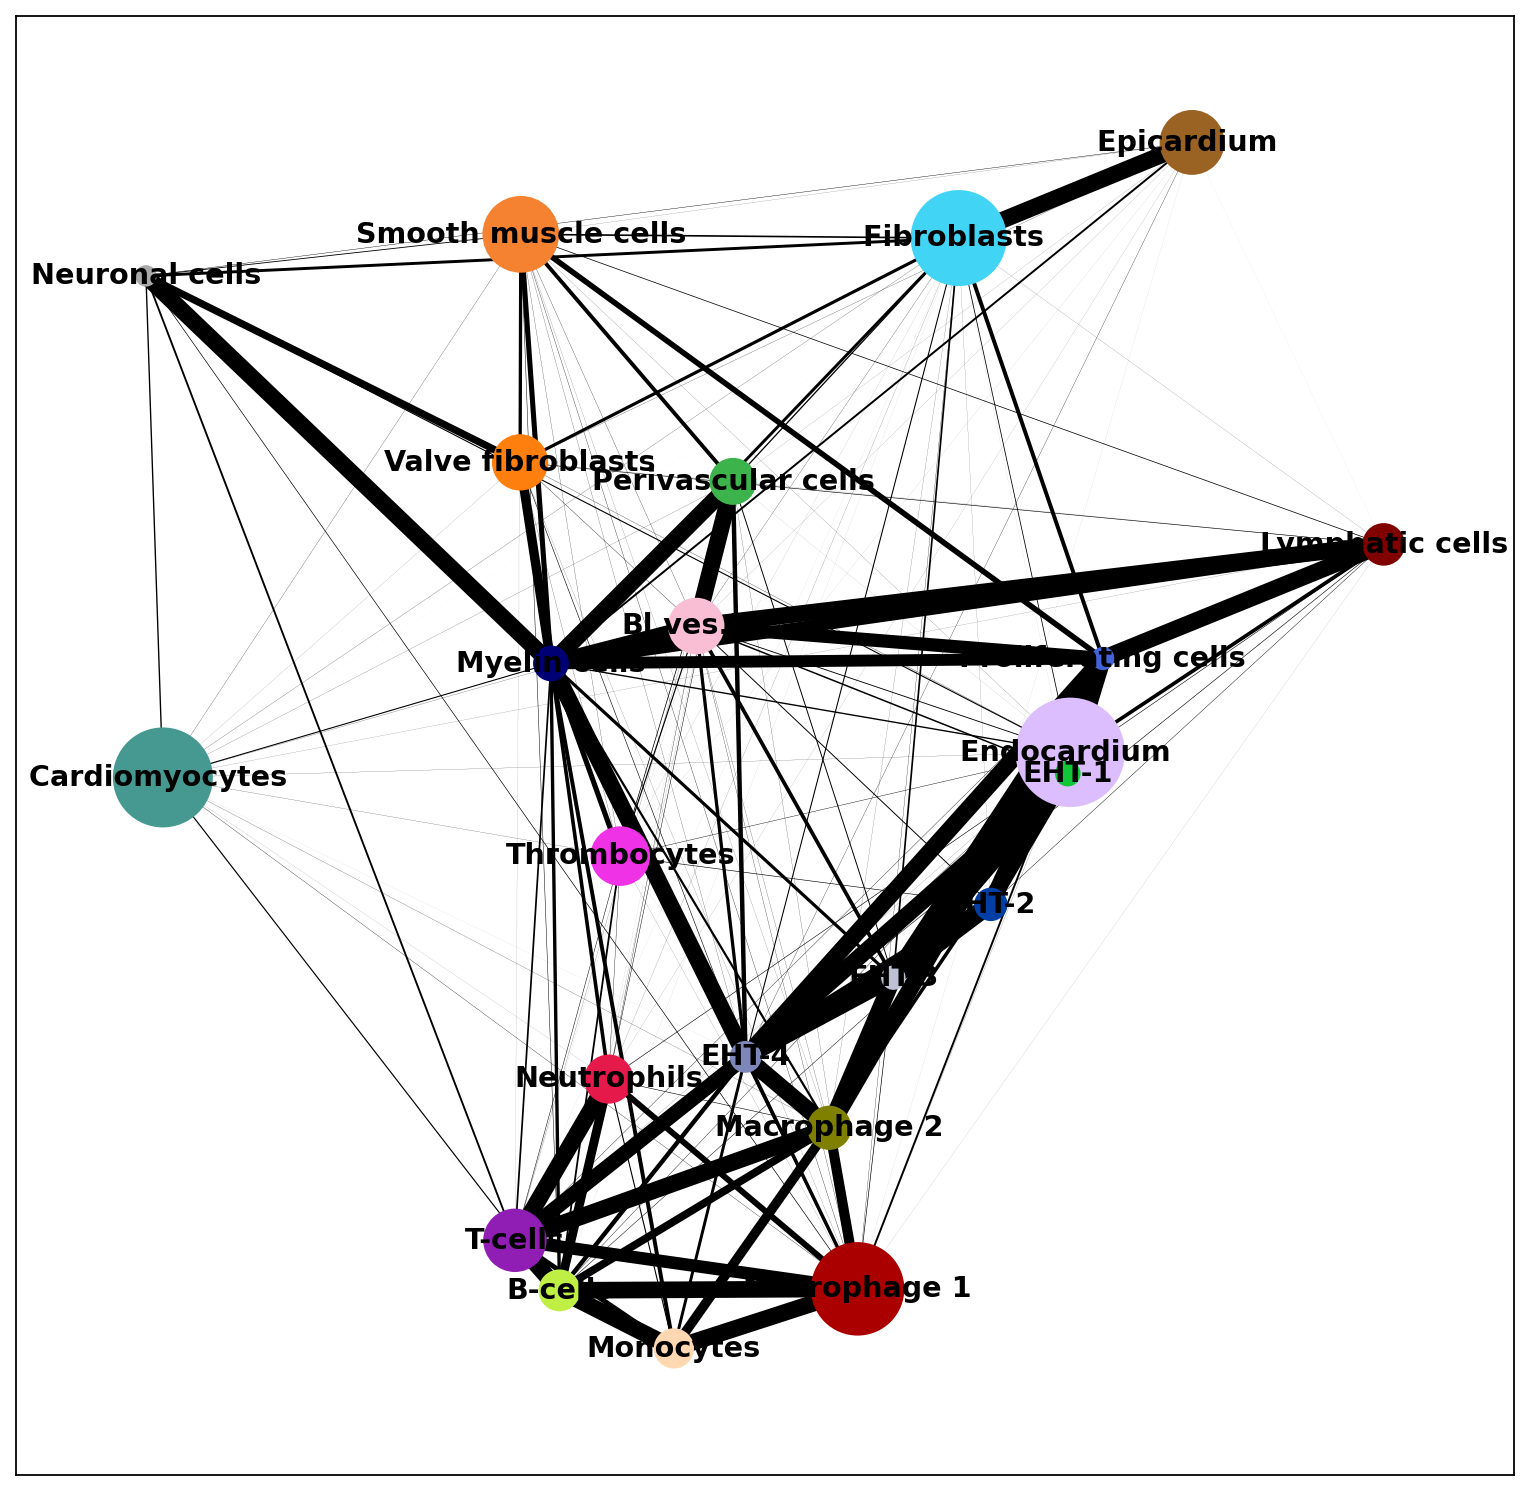

In [53]:
fig, ax = plt.subplots(figsize=(12, 12))
sc.pl.paga(adata0, threshold=0.0001, node_size_scale = 3, show=False, ax=ax,pos=adata0.uns['paga']['pos'])
plt.savefig('./figures/paga_CT_Final.pdf', bbox_inches='tight')

In [46]:
#fig, ax = plt.subplots(figsize=(24, 12))
sc.pl.paga_compare(adata0, threshold=0.000001, node_size_scale = 1, show=False,size=5,
                  legend_fontsize=5,save='paga_CT_Final_UmapEmbed.pdf')
#plt.savefig('Umap_paga_CT_Final_comp.pdf', bbox_inches='tight')

--> added 'pos', the PAGA positions (adata.uns['paga'])


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: xlabel='UMAP1', ylabel='UMAP2'>, <Axes: >]

In [34]:
adata0.write('./write/All_outer_filtered.h5ad')